In [1]:
# Importing required modules
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

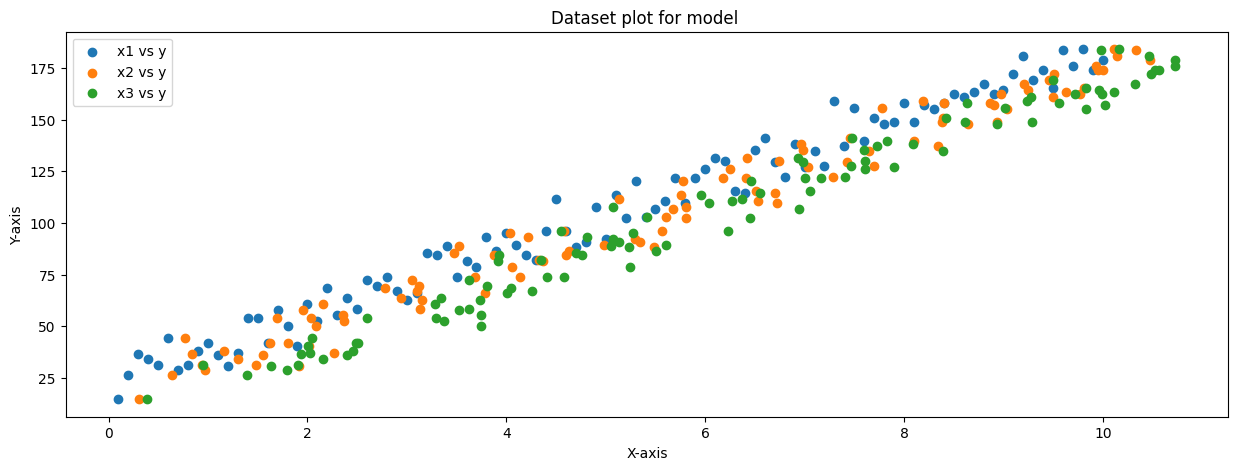

In [2]:
# Reading the dataset.
df = pd.read_csv('Data4.csv')

# Plotting dataset to predict model for the prediction. Plotting how y varies with 
# individual features.
plt.figure(figsize=(15, 5))
plt.scatter(df['x1'], df['y'], label='x1 vs y')
plt.scatter(df['x2'], df['y'], label='x2 vs y')
plt.scatter(df['x3'], df['y'], label='x3 vs y')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Dataset plot for model ')
plt.legend()
plt.show()

As we can see from above plot that y varies linearly with each feature in the dataset. This means y has linear relationship with features in the datast. So, we can apply multiple linear regression to predict. 

In [3]:
# Based on the above plot defining model.
# defining Model for above graph.
column_names = [c for c in df.columns if 'sl' not in c.lower()]
output_data = df[column_names[-1]]

In [4]:
# Creating matrix A for the calculation.
matrix_A = [[0] * (len(column_names)) for _ in range((len(column_names)))]
y_X_vector = [0] * (len(column_names))
def matrix_and_YX_vector(df, column_names):
    '''Modifies the matrix calculated and yx product.
    df is length of dataset anf column_names is features names list.'''
    # Defining c the value to insert as new dimension in dataset.
    c = 1
    for i in range(len(df)):
        #This handles the creating of d by d matrix as well as summation.
        for j in range(len(column_names)):                
            for k in range(len(column_names)):
                # Thes control statements handles the insertiong of new dimension.
                if j == len(column_names) - 1 and k == len(column_names) - 1:
                    matrix_A[j][k] += c * c
                elif j == len(column_names) - 1 and k != len(column_names) - 1:
                    matrix_A[j][k] += c * df[column_names[k]][i]
                elif  j != len(column_names) - 1 and k == len(column_names) - 1:
                    matrix_A[j][k] += df[column_names[j]][i] *  c
                else:
                    matrix_A[j][k] += df[column_names[j]][i] * df[column_names[k]][i] 

            # This control statements calculate YiXi vector and it's summation over whole datapoints.    
            if j == len(column_names) - 1:
                y_X_vector[j] += output_data[i] * c
            else:
                y_X_vector[j] += output_data[i] * df[column_names[j]][i]
matrix_and_YX_vector(df, column_names)

In [5]:
# taking inverse of the matrix.
def invert_A(m):
    """m is a square matrix."""
    return np.linalg.inv(m)

inverse_A = invert_A(matrix_A)

In [6]:
# Calculating w vector.
w_vector = []
def calc_w_vector(inverse_A):
    '''Calculates w vector. parameter inverse_A is a inverse matrix.'''
    for j in range(len(inverse_A)):
        v = 0
        for k in range(len(y_X_vector)):
            v += inverse_A[j][k] * y_X_vector[k]
        w_vector.append(v)
calc_w_vector(inverse_A)

# y predicted list.
y_predicted = []
for i in range(len(df)):
    y_predicted.append(w_vector[0] * df['x1'][i] + w_vector[0] * df['x2'][i] + w_vector[0] * df['x3'][i])


In [7]:
# predicting with linear regression from scikit learn.
regr = LinearRegression()

x = df[['x1', 'x2', 'x3']]
y_array = np.array(df['y']).reshape(-1, 1)

regr.fit(x, y_array)
print("Slope: ",regr.coef_)
print("Intercept: ",regr.intercept_)

y_pred_array = regr.predict(x)

y_pred_list = list(y_pred_array.reshape(1,-1)[0])

Slope:  [[6.13243763 2.39226554 7.74681038]]
Intercept:  [13.23947782]


In [8]:
# Comparing w_vectors.
print("vector from scikit", [regr.coef_, regr.intercept_])
print("vector from own implementation", w_vector)

vector from scikit [array([[6.13243763, 2.39226554, 7.74681038]]), array([13.23947782])]
vector from own implementation [6.132437632706342, 2.3922655421880563, 7.746810379932413, 13.239477824443384]


In [9]:
# function to calculate r square
def R_square(y, yp):
    rss = 0
    tss = 0
    m = np.mean(y)
    for i in range(len(y)):
        rss += (y[i] - yp[i]) ** 2
        tss += (y[i] - m) ** 2
    return 1 - (rss/tss)

In [13]:
# Comparing r square with my own and scikit.
print(R_square(output_data, y_predicted))
print(R_square(output_data, y_pred_list))

0.9621319937092727
0.9841749058943147


Solving loss function with help of gradient descent.

In [ ]:
# w_t+1 = w_t + eta* gradient
df = df.drop(columns='Sl.')
df = df.drop(columns='y')
def gradient(w,df):
    result = 0
    s_df = df.sample(frac=1, axis=1, random_state=42) # shuffling the columns of dataframe
    for i in range(len(s_df)):
        r= np.array(s_df.iloc[i][:])
        y_hat = r@w
        result += (output_data[i]-y_hat)*s_df.iloc[i][:]
    return (result*(-2)/len(df)).values.reshape((-1,1))

In [29]:
eta = 0.0001
w_o = np.zeros((len(column_names) - 1, 1)) #initialize all w with zero.
epoch = 0
while True:
    w_n = w_o - eta*(gradient(w_o, df))
    up = w_o - w_n
    down = w_n
    epoch += 1
    if np.linalg.norm(up)/np.linalg.norm(down) <= 1e-4:
        break
        
    w_o = w_n
w = np.array(w_o)
print("epoch:", epoch)
print(w)

epoch: 239
[[5.53640976]
 [6.02610985]
 [6.5593706 ]]


In [27]:
y_predicted_g = []
for i in range(len(df)):
    y_predicted_g.append(w[0][0] * df['x1'][i] + w[1][0] * df['x2'][i] + w[2][0] * df['x3'][i])

In [28]:
print("R square obtained:", R_square(output_data, y_predicted_g))

R square obtained: 0.9643237976404084
